In [1]:
#import required libraries

import pandas as pd
import numpy as num
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import dataframe_image as dfi

In [2]:
#import data

data = pd.read_csv('/Users/amand/ds240/data/BRFSS Mental Health.csv', index_col = 0)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 385 entries, 0 to 384
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   location_id        385 non-null    int64  
 1   year               385 non-null    int64  
 2   DECIDE_yes_value   385 non-null    float64
 3   DECIDE_yes_sample  385 non-null    int64  
 4   DECIDE_no_value    385 non-null    float64
 5   DECIDE_no_sample   385 non-null    int64  
 6   resp222_value      164 non-null    float64
 7   resp222_sample     164 non-null    float64
 8   resp223_value      164 non-null    float64
 9   resp223_sample     164 non-null    float64
 10  resp224_value      164 non-null    float64
 11  resp224_sample     164 non-null    float64
dtypes: float64(8), int64(4)
memory usage: 39.1 KB


In [4]:
data

,location_id,year,DECIDE_yes_value,DECIDE_yes_sample,DECIDE_no_value,DECIDE_no_sample,resp222_value,resp222_sample,resp223_value,resp223_sample,resp224_value,resp224_sample
0,1,2015,15.0,1174,85.0,6526,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,14.3,979,85.7,5812,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2017,15.8,998,84.2,5498,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2018,15.8,958,84.2,5423,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019,16.7,1016,83.3,5763,58.0,4302.0,24.5,1580.0,17.5,1040.0
...,...,...,...,...,...,...,...,...,...,...,...,...
380,99,2017,10.7,53,89.4,53,NaN,NaN,NaN,NaN,NaN,NaN
381,99,2018,11.0,53,89.0,53,NaN,NaN,NaN,NaN,NaN,NaN
382,99,2019,11.7,52,88.3,52,61.4,52.0,24.9,52.0,13.8,52.0
383,99,2020,10.8,53,89.2,53,61.7,53.0,23.7,53.0,13.1,53.0


In [5]:
data.head()

,location_id,year,DECIDE_yes_value,DECIDE_yes_sample,DECIDE_no_value,DECIDE_no_sample,resp222_value,resp222_sample,resp223_value,resp223_sample,resp224_value,resp224_sample
0,1,2015,15.0,1174,85.0,6526,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,14.3,979,85.7,5812,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2017,15.8,998,84.2,5498,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2018,15.8,958,84.2,5423,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019,16.7,1016,83.3,5763,58.0,4302.0,24.5,1580.0,17.5,1040.0


In [6]:
before_head = data.head()

In [7]:
before_head.to_csv('before.csv')

In [8]:
data.rename(columns={
    'DECIDE_yes_value': 'Serious difficulty concentrating',
    'DECIDE_no_value': 'No serious difficulty concentrating',
    'resp222_value': 'Zero days of poor mental health',
    'resp223_value': '1-13 days of poor mental health',
    'resp224_value': '14 or more days of poor mental health',
    'DECIDE_yes_sample': 'Number of YES responses',
    'DECIDE_no_sample': 'Number of NO responses',
    'resp222_sample': 'Zero days responses',
    'resp223_sample': '1-13 days responses',
    'resp224_sample': '14+ days responses'
}, inplace = True)

In [9]:
data.shape

(385, 12)

In [10]:
data.head(5)

,location_id,year,Serious difficulty concentrating,Number of YES responses,No serious difficulty concentrating,Number of NO responses,Zero days of poor mental health,Zero days responses,1-13 days of poor mental health,1-13 days responses,14 or more days of poor mental health,14+ days responses
0,1,2015,15.0,1174,85.0,6526,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2016,14.3,979,85.7,5812,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2017,15.8,998,84.2,5498,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2018,15.8,958,84.2,5423,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2019,16.7,1016,83.3,5763,58.0,4302.0,24.5,1580.0,17.5,1040.0


In [11]:
data = data.dropna()

In [12]:
data.shape

(164, 12)

In [13]:
data.head(10)

,location_id,year,Serious difficulty concentrating,Number of YES responses,No serious difficulty concentrating,Number of NO responses,Zero days of poor mental health,Zero days responses,1-13 days of poor mental health,1-13 days responses,14 or more days of poor mental health,14+ days responses
4,1,2019,16.7,1016,83.3,5763,58.0,4302.0,24.5,1580.0,17.5,1040.0
5,1,2020,14.0,687,86.0,4465,60.8,3319.0,23.4,1177.0,15.8,757.0
6,1,2021,15.1,570,84.9,3853,56.7,2748.0,24.9,1061.0,18.4,705.0
11,10,2019,10.5,393,89.5,3352,61.3,2452.0,25.3,865.0,13.5,474.0
12,10,2020,9.8,363,90.2,3435,65.2,2648.0,22.5,829.0,12.3,482.0
13,10,2021,10.8,335,89.2,3105,63.0,2311.0,24.1,830.0,13.0,430.0
18,11,2019,10.2,222,89.8,2281,54.0,1573.0,34.4,719.0,11.5,260.0
19,11,2020,10.8,271,89.2,2996,51.6,1947.0,33.9,992.0,14.5,410.0
20,11,2021,10.4,237,89.6,2773,50.5,1764.0,35.3,1020.0,14.2,347.0
25,12,2019,12.9,2178,87.1,13841,64.2,10585.0,22.0,3235.0,13.8,2279.0


In [14]:
edited_head = data.head(10)

In [17]:
edited_head.to_csv('edited.csv')

In [18]:
combined_df=data[['year','No serious difficulty concentrating','Serious difficulty concentrating', "Zero days of poor mental health",'1-13 days of poor mental health','14 or more days of poor mental health']]

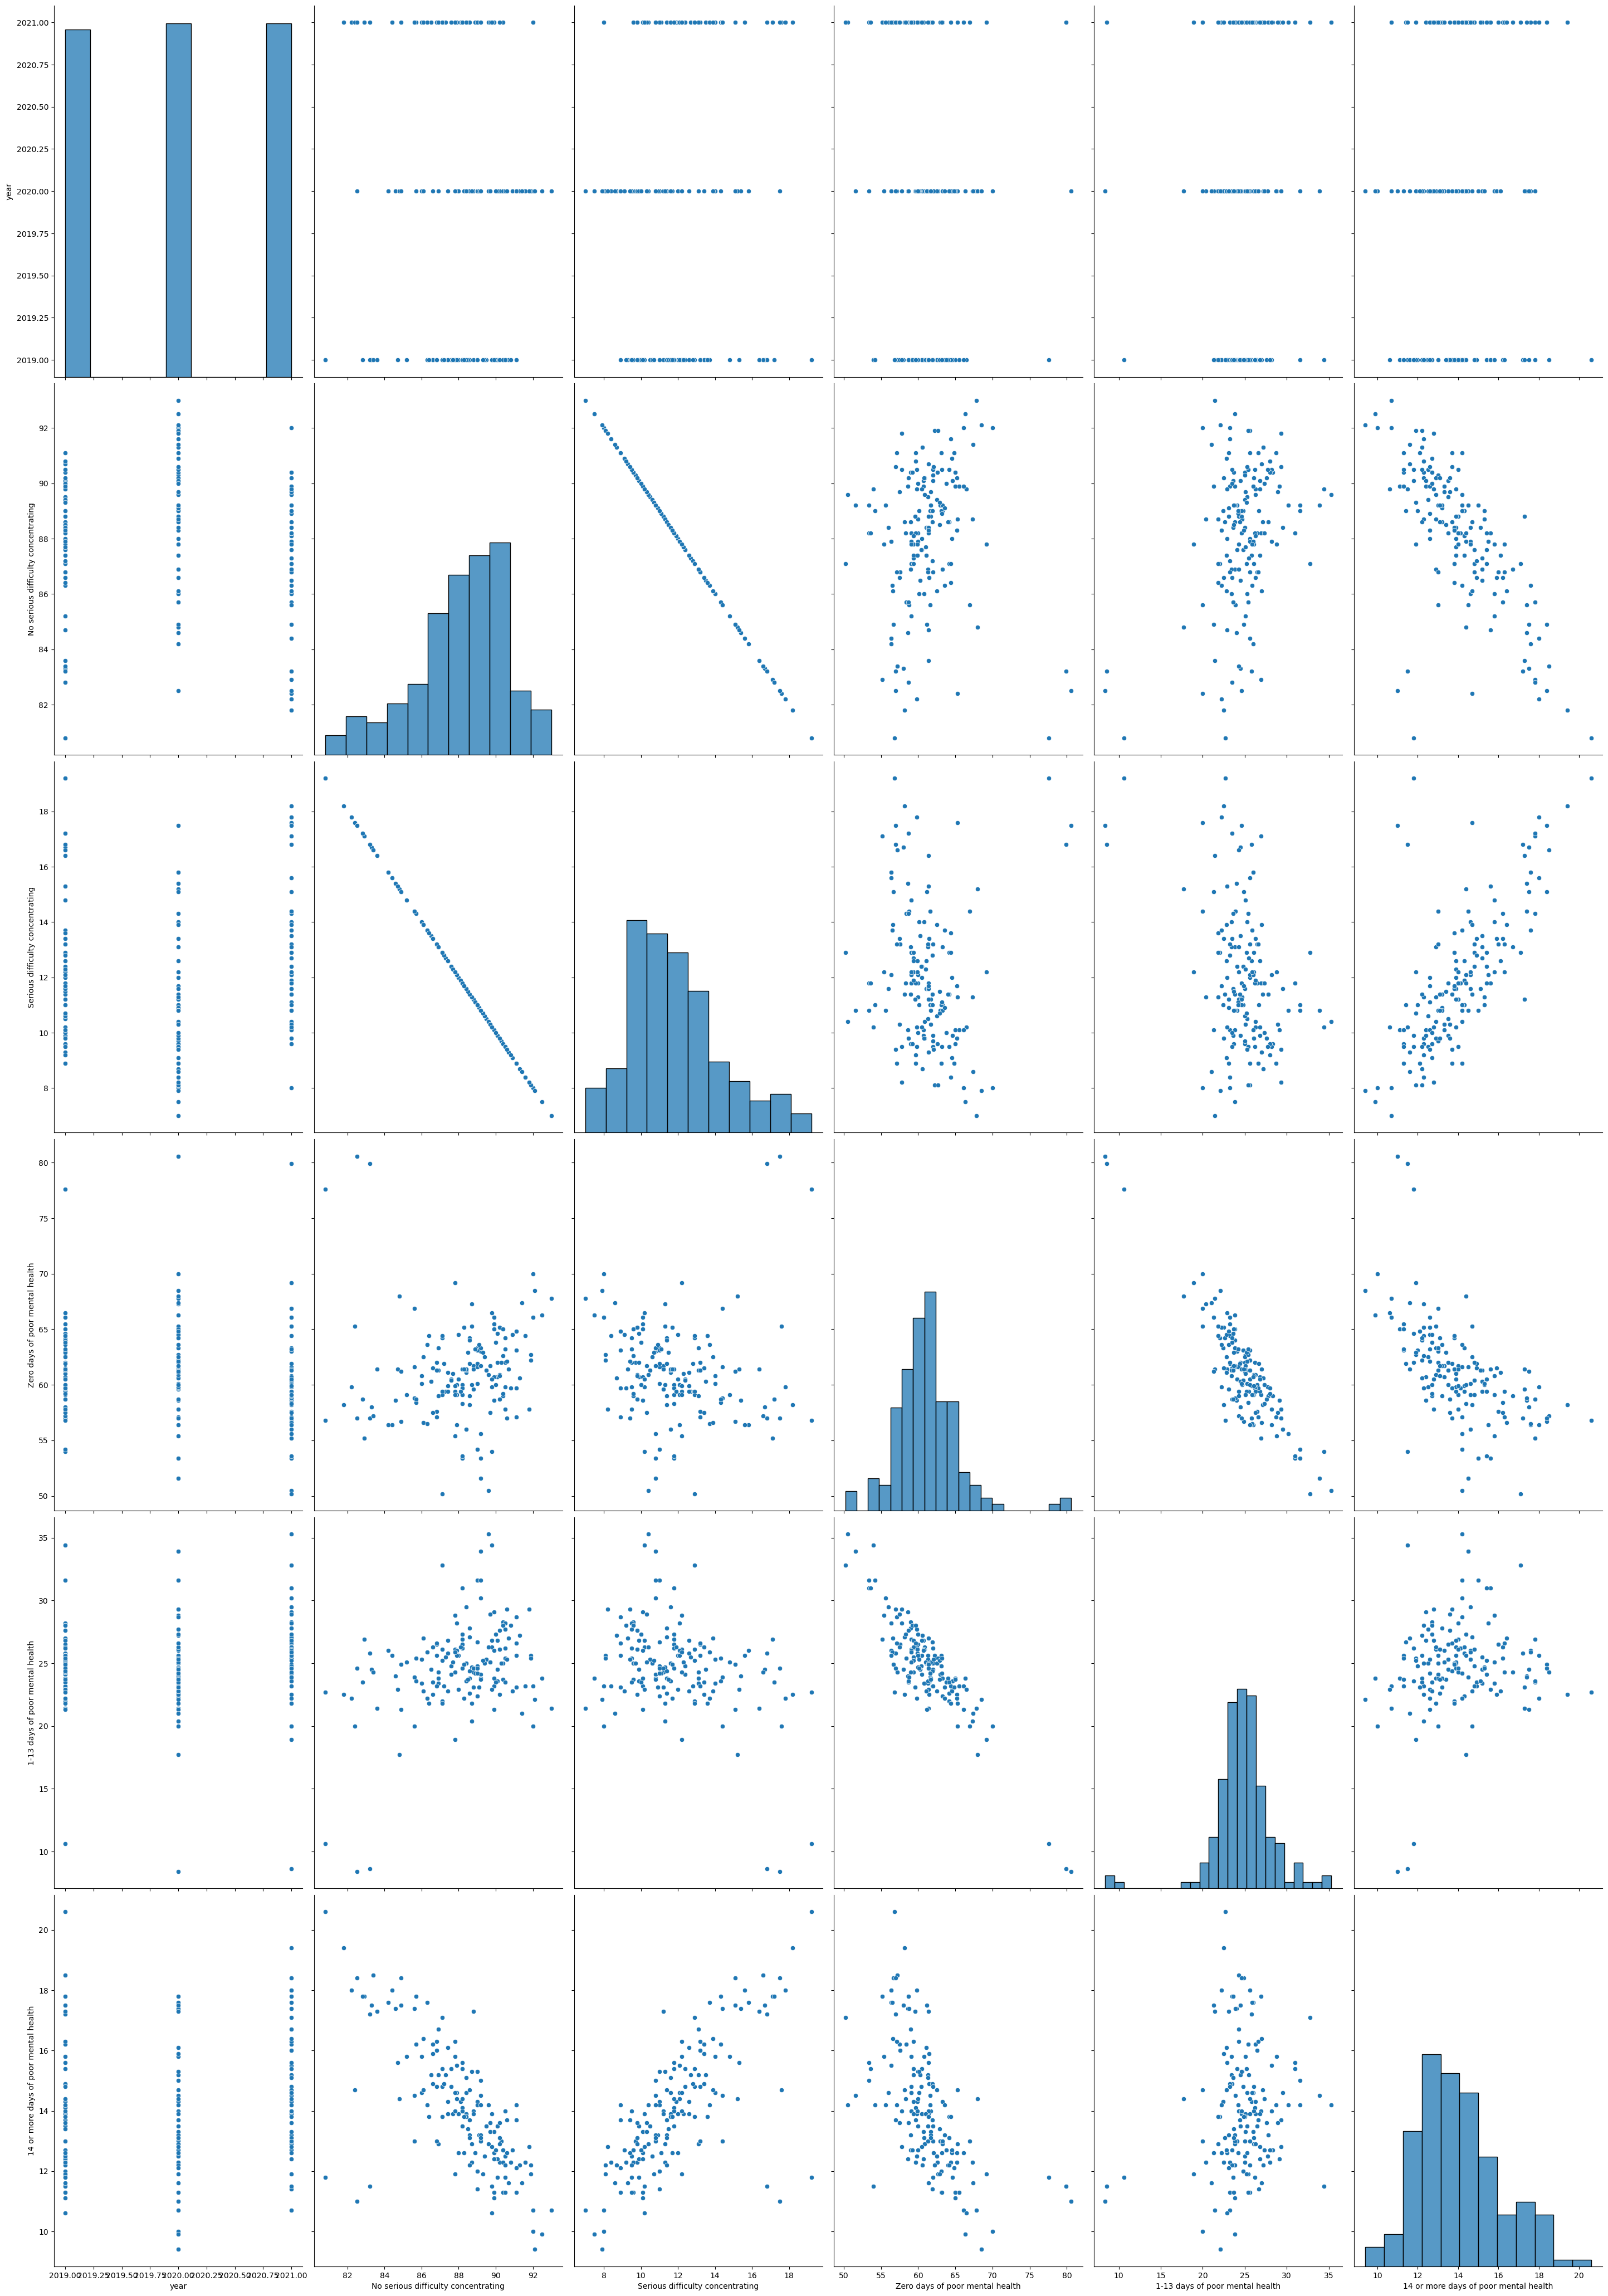

In [19]:
sns.pairplot(combined_df, height=7, aspect=0.7)

seems to be a correlation between difficulty concentrating and 14 or more days of poor mental health

<AxesSubplot:>

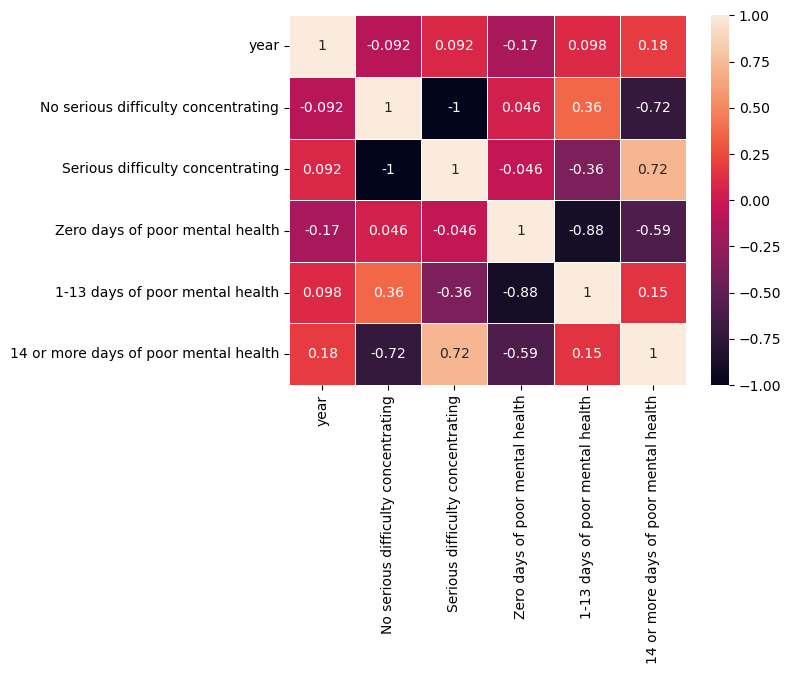

In [20]:
sns.heatmap(combined_df.corr(),linewidth=0.5, annot=True)

In [21]:
x = data[['1-13 days of poor mental health','14 or more days of poor mental health']]
y = data[['No serious difficulty concentrating']]

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=50)

In [23]:
lm = LinearRegression()

lm.fit(x_train, y_train)

LinearRegression()

In [25]:
print('Intercept: ',lm.intercept_)

print("Coefficients: ", lm.coef_)

Intercept:  [93.17764086]
Coefficients:  [[ 0.32697035 -0.94295352]]


In [26]:
y_pred = lm.predict(x_test)

Text(0, 0.5, 'Predicted values')

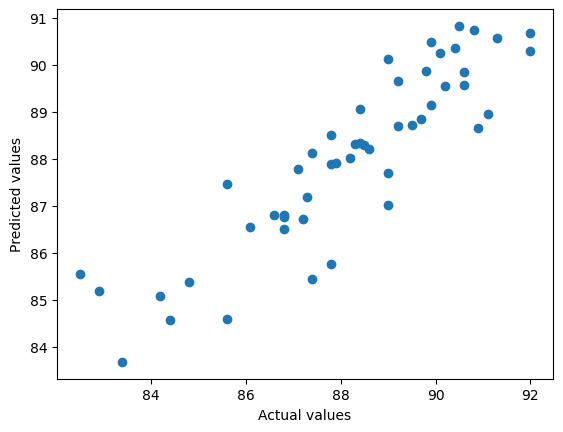

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [28]:
vari = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test,y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

print('Variance: ', vari)
print('R2: ', r2)
print('Mean squared: ', mse)

Variance:  0.7864632406004994
R2:  0.7812266033259123
Mean squared:  1.1533742223593768


In [29]:
x=data[['1-13 days of poor mental health','14 or more days of poor mental health','Zero days of poor mental health']]

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [31]:
lm.fit(x_train,y_train)

LinearRegression()

In [32]:
print('Intercept: ', lm.intercept_)

print('Coefficient: ', lm.coef_)

Intercept:  [151.26491118]
Coefficient:  [[-0.25433249 -1.51898527 -0.58208012]]


Text(0, 0.5, 'Predicted values')

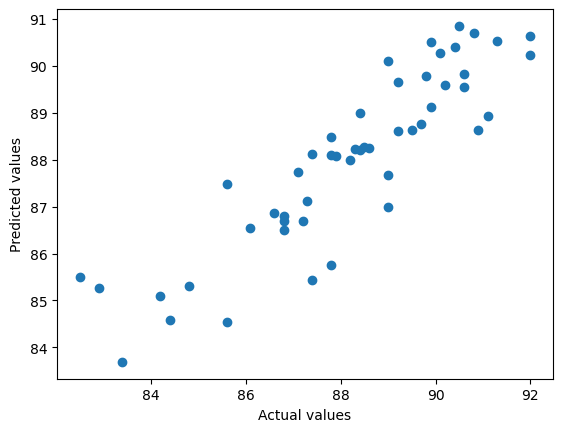

In [33]:
y_pred = lm.predict(x_test)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")

In [34]:
vari = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test,y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)

print('Variance: ', vari)
print('R2: ', r2)
print('Mean squared: ', mse)

Variance:  0.7824472279216439
R2:  0.7764072458303093
Mean squared:  1.1787818943536261
